<a href="https://colab.research.google.com/github/LucaR45/Cnn-Rock-Paper-Scissors/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration and Preprocessing

In [2]:
import os
# Insert your kaggle data
os.environ['KAGGLE_USERNAME'] = "xxxxxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxxxxx"

In [3]:
# Download a dataset from Kaggle
!kaggle datasets download -d drgfreeman/rockpaperscissors --unzip

Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
 84% 257M/306M [00:00<00:00, 268MB/s] 
100% 306M/306M [00:03<00:00, 97.8MB/s]


In [4]:
print("Rock images :" +str(len(os.listdir('/content/rock'))))
print("Paper images :" +str(len(os.listdir('/content/paper'))))
print("Scissors images :" +str(len(os.listdir('/content/scissors'))))

Rock images :726
Paper images :712
Scissors images :750


In [5]:
rock_path = '/content/rock'
paper_path = '/content/paper'
scissors_path = '/content/scissors'

rock_images = os.listdir(rock_path)
paper_images = os.listdir(paper_path)
scissors_images = os.listdir(scissors_path)

print(len(rock_images))
print(len(paper_images))
print(len(scissors_images))

726
712
750


Dataframe


In [6]:
path = '/content/rps-cv-images'

In [7]:
paths = []
labels = []
base_dir = "/content/rps-cv-images"
for item_name in os.listdir(base_dir):
  item_path = os.path.join(base_dir, item_name)
  if os.path.isdir(item_path): # Check if the item is a directory
    for path in os.listdir(item_path):
      if item_name == 'paper':
        labels.append("paper")
      elif item_name == 'scissors':
        labels.append("scissors")
      else:
        labels.append("rock")
      paths.append(os.path.join(item_path, path))

In [8]:
import pandas as pd

df = pd.DataFrame()
df['paths'] = paths
df['label'] = labels

df.iloc[720:730]

,paths,label
720,/content/rps-cv-images/scissors/CTbANISUvZMD2T...,scissors
721,/content/rps-cv-images/scissors/XPvABb1iOSQx69...,scissors
722,/content/rps-cv-images/scissors/LFzPbXpksRrG9j...,scissors
723,/content/rps-cv-images/scissors/sYwtAuLI5zLIEf...,scissors
724,/content/rps-cv-images/scissors/xKyBoUZHpqSVqT...,scissors
725,/content/rps-cv-images/scissors/SJCguzLeVcfuZ2...,scissors
726,/content/rps-cv-images/scissors/otBEUIQNFGMk80...,scissors
727,/content/rps-cv-images/scissors/zdo3LHesq3aHmu...,scissors
728,/content/rps-cv-images/scissors/3UH9T0W1eZQW36...,scissors
729,/content/rps-cv-images/scissors/xOdLJOH2sxWkgR...,scissors


Image Properties


In [9]:
Height = 96
Width = 96
Size = (Width, Height)
Channels = 3

Generator
Splitting data and generator

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 90)
df_train, df_validation = train_test_split(df_train, test_size=0.2/0.9, random_state = 90 )

In [12]:
df_test

,paths,label
430,/content/rps-cv-images/scissors/pLBH6c1NAfL1xV...,scissors
1938,/content/rps-cv-images/paper/KAyKztBfGIWm4qN7.png,paper
631,/content/rps-cv-images/scissors/TxkHaqZ5Mg3Jfs...,scissors
1973,/content/rps-cv-images/paper/E10FR2TKbBsv9Hgm.png,paper
2156,/content/rps-cv-images/paper/p2Y8kJZKuaHvM4dk.png,paper
...,...,...
14,/content/rps-cv-images/scissors/NCHfmPjxa7aay5...,scissors
1915,/content/rps-cv-images/paper/ocaU2HmemX7rmjm0.png,paper
1184,/content/rps-cv-images/rock/9STiLxSOXvh5kjda.png,rock
728,/content/rps-cv-images/scissors/3UH9T0W1eZQW36...,scissors


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255)

test_gen = data_generator.flow_from_dataframe(dataframe = df_test,
                                                        directory=None,
                                                        x_col="paths", y_col="label",
                                                        batch_size=64, seed = 55,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Size)
train_gen = data_generator.flow_from_dataframe(dataframe = df_train,
                                                        directory=None,
                                                        x_col="paths", y_col="label",
                                                        batch_size=64, seed = 55,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Size)
valid_gen = data_generator.flow_from_dataframe(dataframe = df_validation,
                                                        directory=None,
                                                        x_col="paths", y_col="label",
                                                        batch_size=64, seed = 55,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Size)

Found 438 validated image filenames belonging to 3 classes.
Found 1361 validated image filenames belonging to 3 classes.
Found 389 validated image filenames belonging to 3 classes.


CNN Architecture and Training

Model 1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
def cnn1():
  cnn1 = Sequential()
  cnn1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(Width, Height, Channels)))
  cnn1.add(BatchNormalization())
  cnn1.add(MaxPooling2D((2, 2)))
  cnn1.add(Dropout(0.3,seed=44))

  cnn1.add(Conv2D(64, (3, 3), activation='relu'))
  cnn1.add(MaxPooling2D((2, 2)))
  cnn1.add(Dropout(0.4,seed=44))

  cnn1.add(Flatten())
  cnn1.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
  cnn1.add(Dropout(0.4,seed=44))

  cnn1.add(Dense(3, activation='softmax'))
  custom_adam = Adam(learning_rate=0.0003)

  cnn1.compile(
        loss='categorical_crossentropy',
        optimizer=custom_adam,
        metrics=['accuracy']
    )

  return cnn1

In [ ]:
model_to_train = cnn1()
history1 = model_to_train.fit(
    train_gen,
    epochs= 20,
    validation_data=valid_gen
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4525 - loss: 2.3106 - val_accuracy: 0.4242 - val_loss: 1.6696
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6205 - loss: 1.3756 - val_accuracy: 0.6838 - val_loss: 1.6087
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7638 - loss: 1.0867 - val_accuracy: 0.8432 - val_loss: 1.5471
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8283 - loss: 0.9658 - val_accuracy: 0.8432 - val_loss: 1.4831
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8042 - loss: 0.8925 - val_accuracy: 0.8843 - val_loss: 1.4218
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8550 - loss: 0.7870 - val_accuracy: 0.8380 - val_loss: 1.3596
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8781 - loss: 0.7367 - val_accuracy: 0.8792 - val_loss: 1.2638
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8958 - loss: 0.6786 - val_accuracy: 0.8458 - val_loss:

Text(0.5, 1.0, 'CNN1')

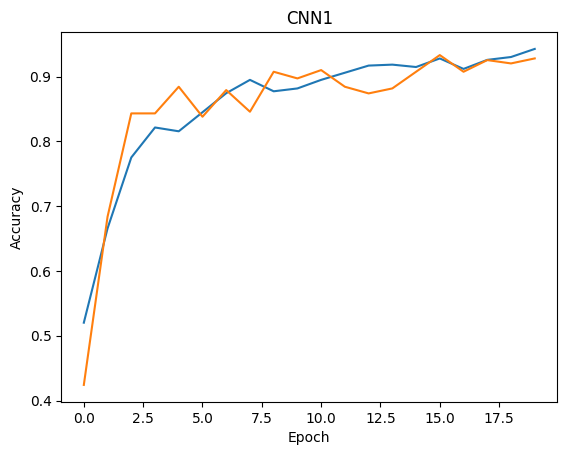

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'], label='training_accuracy')
plt.plot(history1.history['val_accuracy'], label = 'test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("CNN1")



Model 2


In [ ]:
def cnn2():
  cnn2 = Sequential()


  cnn2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(Width, Height, Channels)))
  cnn2.add(BatchNormalization())
  cnn2.add(MaxPooling2D((2, 2)))
  cnn2.add(Dropout(0.3,seed=44))


  cnn2.add(Conv2D(32, (3, 3), activation='relu'))
  cnn2.add(MaxPooling2D((2, 2)))
  cnn2.add(Dropout(0.4,seed=44))

  cnn2.add(Conv2D(32, (3, 3), activation='relu'))
  cnn2.add(MaxPooling2D((2, 2)))
  cnn2.add(Dropout(0.4,seed=44))

  cnn2.add(Flatten())
  cnn2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
  cnn2.add(Dropout(0.4,seed=44))

  cnn2.add(Dense(3, activation='softmax'))
  custom_adam = Adam(learning_rate=0.0003)

  cnn2.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

  return cnn2

In [ ]:
model_to_train2 = cnn2()
history2 = model_to_train2.fit(
    train_gen,
    epochs= 20,
    validation_data=valid_gen,
    )

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3702 - loss: 2.5152 - val_accuracy: 0.5758 - val_loss: 1.6758
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5549 - loss: 1.5567 - val_accuracy: 0.6067 - val_loss: 1.6091
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6934 - loss: 1.2364 - val_accuracy: 0.7481 - val_loss: 1.5654
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8271 - loss: 0.9609 - val_accuracy: 0.7789 - val_loss: 1.5296
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8305 - loss: 0.8955 - val_accuracy: 0.8792 - val_loss: 1.4801
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8988 - loss: 0.7170 - val_accuracy: 0.8458 - val_loss: 1.4372
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8957 - loss: 0.6971 - val_accuracy: 0.8817 - val_loss: 1.3678
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9170 - loss: 0.5929 - val_accuracy: 0.8972 - val_loss:

Text(0.5, 1.0, 'CNN2')

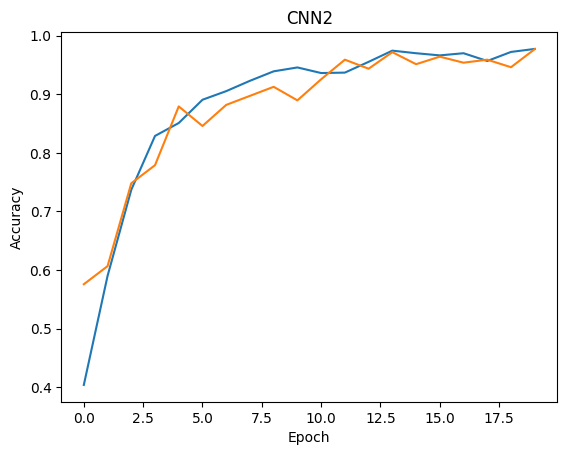

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], label='training_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("CNN2")

Model 3

In [ ]:
def cnn3():
  cnn3 = Sequential()


  cnn3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(Width, Height, Channels)))
  cnn3.add(BatchNormalization())
  cnn3.add(MaxPooling2D((2, 2)))
  cnn3.add(Dropout(0.3,seed=44))


  cnn3.add(Conv2D(64, (3, 3), activation='relu'))
  cnn3.add(MaxPooling2D((2, 2)))
  cnn3.add(Dropout(0.4,seed=44))

  cnn3.add(Conv2D(64, (3, 3), activation='relu'))
  cnn3.add(MaxPooling2D((2, 2)))
  cnn3.add(Dropout(0.4,seed=44))

  cnn3.add(Flatten())
  cnn3.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
  cnn3.add(Dropout(0.4,seed=44))

  cnn3.add(Dense(3, activation='softmax'))
  custom_adam = Adam(learning_rate=0.0003)

  cnn3.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

  return cnn3

In [ ]:
model_to_train3 = cnn3()
history3 = model_to_train3.fit(
    train_gen,
    epochs= 20,
    validation_data=valid_gen,
   )

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.3820 - loss: 2.8013 - val_accuracy: 0.4396 - val_loss: 1.6809
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5938 - loss: 1.5394 - val_accuracy: 0.6247 - val_loss: 1.5961
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7547 - loss: 1.1280 - val_accuracy: 0.5167 - val_loss: 1.5289
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8430 - loss: 0.8426 - val_accuracy: 0.5039 - val_loss: 1.4857
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8746 - loss: 0.7262 - val_accuracy: 0.5810 - val_loss: 1.4179
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9180 - loss: 0.5986 - val_accuracy: 0.5784 - val_loss: 1.3322
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9371 - loss: 0.5017 - val_accuracy: 0.5347 - val_loss: 1.2593
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9489 - loss: 0.4419 - val_accuracy: 0.5861 - val_loss:

Text(0.5, 1.0, 'CNN3')

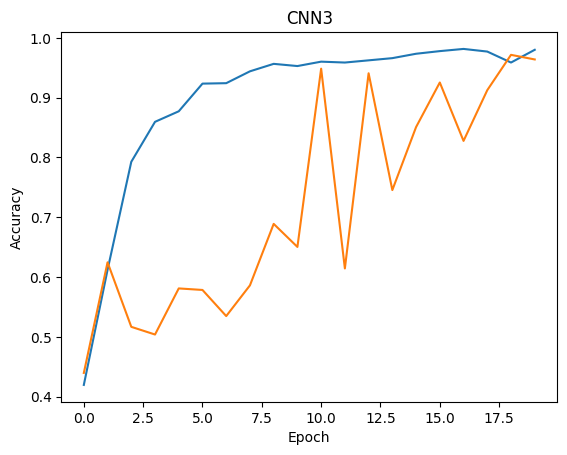

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'], label='training_accuracy')
plt.plot(history3.history['val_accuracy'], label = 'test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("CNN3")

Code forevaluation and analysis


In [ ]:
test_loss, test_acc = model_to_train.evaluate(test_gen)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.9532 - loss: 0.4215
Test Loss: 0.4221484065055847
Test Accuracy: 0.9589040875434875


In [ ]:
test_loss, test_acc = model_to_train2.evaluate(test_gen)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.9836 - loss: 0.3552
Test Loss: 0.34743908047676086
Test Accuracy: 0.9794520735740662


In [ ]:
test_loss, test_acc = model_to_train3.evaluate(test_gen)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.9688 - loss: 0.2675
Test Loss: 0.27807459235191345
Test Accuracy: 0.9680365324020386


Text(0.5, 1.0, 'CNN1')

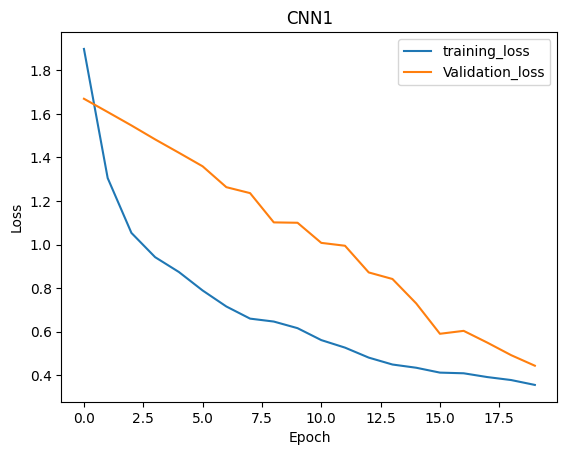

In [ ]:
plt.plot(history1.history['loss'], label='training_loss')
plt.plot(history1.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("CNN1")

Text(0.5, 1.0, 'CNN2')

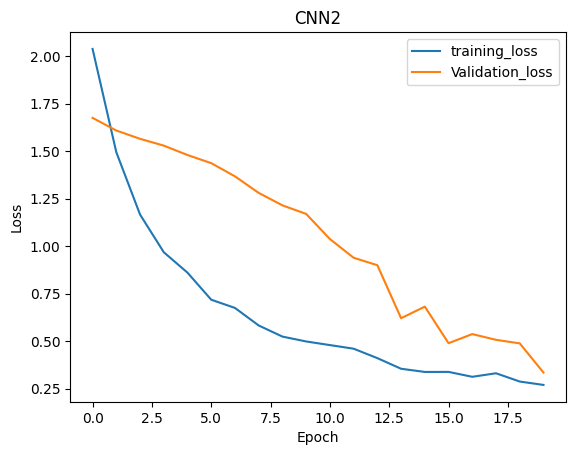

In [ ]:
plt.plot(history2.history['loss'], label='training_loss')
plt.plot(history2.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("CNN2")

Text(0.5, 1.0, 'CNN3')

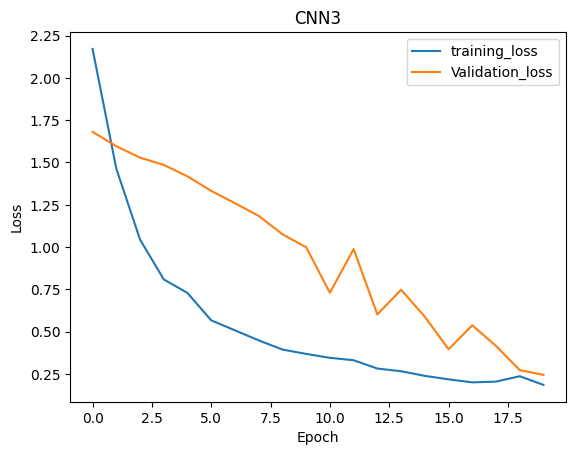

In [ ]:
plt.plot(history3.history['loss'], label='training_loss')
plt.plot(history3.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("CNN3")

Cross validation

In [ ]:
test_accuracy= []
test_loss = []


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True, random_state=87)
for fold, (train_index, test_index) in enumerate(kfold.split(df)):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    data_generator = ImageDataGenerator(rescale=1./255)
    test_gen = data_generator.flow_from_dataframe(dataframe = test_data,
                                                        directory=None,
                                                        x_col="paths", y_col="label",
                                                        batch_size=64, seed = 55,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Size)
train_gen = data_generator.flow_from_dataframe(dataframe = train_data,
                                                        directory=None,
                                                        x_col="paths", y_col="label",
                                                        batch_size=64, seed = 55,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Size)
valid_gen = data_generator.flow_from_dataframe(dataframe = validation_data,
                                                        directory=None,
                                                        x_col="paths", y_col="label",
                                                        batch_size=64, seed = 55,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Size)

cv= model_to_train3
cv.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

history_of_cv = cv.fit(
        train_gen,
        validation_data=test_gen,
        epochs=20
        )

Found 438 validated image filenames belonging to 3 classes.
Found 438 validated image filenames belonging to 3 classes.
Found 438 validated image filenames belonging to 3 classes.
Found 1361 validated image filenames belonging to 3 classes.
Found 389 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9497 - loss: 0.4771

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9500 - loss: 0.4687 - val_accuracy: 0.9635 - val_loss: 0.2020
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.9776 - loss: 0.1330 - val_accuracy: 0.9658 - val_loss: 0.1540
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9795 - loss: 0.1211 - val_accuracy: 0.9155 - val_loss: 0.2079
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9845 - loss: 0.1002 - val_accuracy: 0.8699 - val_loss: 0.2764
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9792 - loss: 0.1141 - val_accuracy: 0.9795 - val_loss: 0.1160
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9872 - loss: 0.0873 - val_accuracy: 0.9612 - val_loss: 0.1393
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9890 - loss: 0.0839 - val_accuracy: 0.9817 - val_loss: 0.0906
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9945 - loss: 0.0674 - val_accuracy: 0.9726 - val_loss: 0.1021
Epo

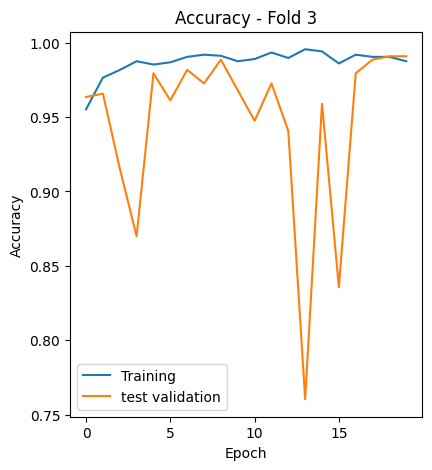

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_of_cv.history['accuracy'], label='Training')
plt.plot(history_of_cv.history['val_accuracy'], label='test validation')
plt.title(f'Accuracy - Fold {fold+1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Codice non integrato

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    restore_best_weights=True
)